# Tugas Sains Data: [harga-rumah-jaksel-dataset]
- **Nama Kelompok:** 
[Moh Naufal Faqih (10222044)], [Andika Fitra Ramadhan (10222043)], [Firman Firdaus (10222033)], [Ryan Azis Saputra (10222041)]
- **Source Dataset:** [(https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah)]

## Import Beberapa Library

In [1]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np

## Muat Dataset dalam Bentuk CSV & Lakukan Validasi Kualitas


In [8]:
namaFile = 'DATASET\HARGA RUMAH JAKSEL.csv'

with open(namaFile, newline = '', encoding = 'utf-8') as file:
  reader = csv.reader(file)
  header = next(reader)
  data = [row for row in reader]

header, data[:5]

(['\ufeffHARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS', 'KOTA'],
 [['', '', '700', '5', '6', 'ADA', 'JAKSEL'],
  ['19,000,000,000', '824', '800', '4', '4', 'ADA', 'JAKSEL'],
  ['4,700,000,000', '500', '400', '4', '3', 'ADA', 'JAKSEL'],
  ['4,900,000,000', '251', '300', '5', '4', 'ADA', 'JAKSEL'],
  ['28,000,000,000', '1340', '575', '4', '5', 'ADA', 'JAKSEL']])

## Assesing Data

### Proses Deteksi Missing Values

In [11]:
missingValues = []

for i, row in enumerate(data):
  for j, value in enumerate(row):
    if value.strip() == '' or value.lower() == "nan" or value is None:
      missingValues.append((i + 1, header[j]))
if missingValues:
  print(f"Missing value Ditemukan pada:")
  for row, col in missingValues:
    print(f" - Baris {row}, Kolom {col}")
  print(f"Total Data yang Hilang: {len(missingValues)}")
else:
  print("Tidak Ditemukan Missing Value.")

Missing value Ditemukan pada:
 - Baris 1, Kolom ﻿HARGA
 - Baris 1, Kolom LT
 - Baris 9, Kolom ﻿HARGA
 - Baris 19, Kolom ﻿HARGA
Total Data yang Hilang: 4


### Proses Deteksi Duplikasi

In [ ]:
duplikasi_identik = {}

for i, row in enumerate(data):

    key = tuple(row)  
    if key in duplikasi_identik:
        duplikasi_identik[key].append(i + 1)  
    else:
        duplikasi_identik[key] = [i + 1]


duplikasi_identik = {key: value for key, value in duplikasi_identik.items() if len(value) > 1}
totalDuplikasiIdentik = sum(len(rows) for rows in duplikasi_identik.values())


if duplikasi_identik:
    print("Data identik yang terduplikasi ditemukan:")
    for key, rows in duplikasi_identik.items():
        print(f" - Data: {key} ditemukan di baris: {rows}")
    print(f"Total data identik yang terduplikasi: {totalDuplikasiIdentik}")
else:
    print("Tidak ada data identik yang terduplikasi.")

Data identik yang terduplikasi ditemukan:
 - Data: ('7,600,000,000', '278', '350', '4', '4', 'ADA', 'JAKSEL') ditemukan di baris: [7, 109]
 - Data: ('7,000,000,000', '384', '400', '4', '4', 'ADA', 'JAKSEL') ditemukan di baris: [14, 285]
 - Data: ('5,800,000,000', '144', '285', '4', '3', 'ADA', 'JAKSEL') ditemukan di baris: [19, 318, 709]
 - Data: ('40,000,000,000', '1500', '700', '4', '4', 'ADA', 'JAKSEL') ditemukan di baris: [23, 125]
 - Data: ('5,680,000,000', '151', '245', '3', '3', 'ADA', 'JAKSEL') ditemukan di baris: [27, 544]
 - Data: ('10,500,000,000', '220', '350', '4', '3', 'ADA', 'JAKSEL') ditemukan di baris: [28, 435]
 - Data: ('7,050,000,000', '128', '315', '3', '3', 'ADA', 'JAKSEL') ditemukan di baris: [29, 823]
 - Data: ('68,000,000,000', '470', '1000', '5', '5', 'ADA', 'JAKSEL') ditemukan di baris: [32, 837]
 - Data: ('85,000,000,000', '770', '500', '4', '4', 'ADA', 'JAKSEL') ditemukan di baris: [34, 844]
 - Data: ('20,900,000,000', '754', '500', '4', '4', 'ADA', 'JAKSEL

In [21]:
# Deteksi Duplikasi Data pada Kolom Harga
harga_data = [row[0].strip() for row in data if row[0].strip() != "" and row[0].lower() != "nan"]

# Mencari duplikasi
duplikasi = {}
for i, value in enumerate(harga_data):
    if value in duplikasi:
        duplikasi[value].append(i + 1)  # Simpan baris duplikasi
    else:
        duplikasi[value] = [i + 1]

# Filter hanya data yang memiliki duplikasi
duplikasi = {key: value for key, value in duplikasi.items() if len(value) > 1}

# Hitung total jumlah data yang duplikasi
total_duplikasi = sum(len(rows) - 1 for rows in duplikasi.values())

# Output hasil
if duplikasi:
    print("Data duplikasi ditemukan pada kolom harga:")
    for value, rows in duplikasi.items():
        print(f" - Nilai '{value}' ditemukan di baris: {rows}")
    print(f"Total jumlah data yang duplikasi: {total_duplikasi}")
else:
    print("Tidak ada data duplikasi pada kolom harga.")

Data duplikasi ditemukan pada kolom harga:
 - Nilai '19,000,000,000' ditemukan di baris: [1, 64, 65, 212, 222, 235, 238, 247, 259, 281, 491, 494, 512, 520, 533, 546, 580, 581, 610, 698, 771]
 - Nilai '4,700,000,000' ditemukan di baris: [2, 679, 755]
 - Nilai '4,900,000,000' ditemukan di baris: [3, 450, 907]
 - Nilai '28,000,000,000' ditemukan di baris: [4, 249, 410, 647, 743, 852, 872, 909, 924, 946, 972]
 - Nilai '10,000,000,000' ditemukan di baris: [5, 76, 242, 277, 285, 313, 345, 380, 426, 563, 589, 668, 677, 725]
 - Nilai '7,600,000,000' ditemukan di baris: [6, 106]
 - Nilai '5,250,000,000' ditemukan di baris: [7, 430, 672]
 - Nilai '10,700,000,000' ditemukan di baris: [9, 134, 674]
 - Nilai '4,200,000,000' ditemukan di baris: [10, 101, 468, 792, 806, 880]
 - Nilai '8,500,000,000' ditemukan di baris: [11, 73, 99, 210, 271, 294, 311, 372, 402, 422, 478, 549, 558, 621, 754, 861, 918, 922]
 - Nilai '7,000,000,000' ditemukan di baris: [12, 282, 339, 358, 359, 411, 472, 598, 612, 626, 8

### Proses Deteksi Outlier menggunakan metode IQR

In [22]:
# Deteksi Outlier
def hitungIQR(data):
    data.sort()
    n = len(data)
    q1 = data[n // 4] if n % 4 == 0 else (data[n // 4] + data[n // 4 - 1]) / 2
    q3 = data[3 * n // 4] if (3*n) % 4 == 0 else (data[3 * n // 4] + data[3*n // 4 - 1]) / 2
    iqr = q3 - q1
    return q1, q3, iqr

dataHarga = [float(row[0].replace(',', '')) for row in data if row[0].strip() != '' and row[0].lower() != 'nan']
q1, q3, iqr = hitungIQR(dataHarga)

lowerBound = q1 - 1.5 * iqr
upperBound = q3 + 1.5 * iqr

outliers = [value for value in dataHarga if value < lowerBound or value > upperBound]
totalOutliers = len(outliers)
print(f"Total Outlier: {totalOutliers}")

print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")
print(f"batas bawah: {lowerBound}, batas atas: {upperBound}")
if outliers:
    print(f"Outlier ditemukan: {outliers}")
else:
    print("Tidak ada outlier ditemukan")

Total Outlier: 65
Q1: 6775000000.0, Q3: 20000000000.0, IQR: 13225000000.0
batas bawah: -13062500000.0, batas atas: 39837500000.0
Outlier ditemukan: [40000000000.0, 40000000000.0, 40000000000.0, 40000000000.0, 40000000000.0, 40000000000.0, 40000000000.0, 40000000000.0, 42000000000.0, 42000000000.0, 42000000000.0, 43000000000.0, 43000000000.0, 45000000000.0, 45000000000.0, 45000000000.0, 47000000000.0, 49000000000.0, 50000000000.0, 50000000000.0, 55000000000.0, 55000000000.0, 55000000000.0, 55000000000.0, 55000000000.0, 55000000000.0, 55000000000.0, 55000000000.0, 55000000000.0, 56000000000.0, 57000000000.0, 60000000000.0, 60000000000.0, 60000000000.0, 60000000000.0, 65000000000.0, 65000000000.0, 68000000000.0, 68000000000.0, 68000000000.0, 68000000000.0, 72000000000.0, 75000000000.0, 75000000000.0, 75000000000.0, 77500000000.0, 80000000000.0, 85000000000.0, 85000000000.0, 85000000000.0, 85000000000.0, 85500000000.0, 90000000000.0, 95000000000.0, 100000000000.0, 110000000000.0, 120000000

## Cleaning Data

### Proses Menangani Missing Value

In [23]:
cleaned_data = [row for row in data if all(value.strip() != "" and value.lower() != "nan" and value is not None for value in row)]

# Output hasil
print(f"Jumlah data sebelum pembersihan: {len(data)}")
print(f"Jumlah data setelah pembersihan: {len(cleaned_data)}")
print(f"Jumlah baris yang dihapus: {len(data) - len(cleaned_data)}")

Jumlah data sebelum pembersihan: 1001
Jumlah data setelah pembersihan: 998
Jumlah baris yang dihapus: 3


Validasi Apakah Masih Ada Data yang Missing

In [24]:
missingValues = []

for i, row in enumerate(cleaned_data):
  for j, value in enumerate(row):
    if value.strip() == '' or value.lower() == "nan" or value is None:
      missingValues.append((i + 1, header[j]))
if missingValues:
  print(f"Missing value Ditemukan pada:")
  for row, col in missingValues:
    print(f" - Baris {row}, Kolom {col}")
  print(f"Total Data yang Hilang: {len(missingValues)}")
else:
  print("Tidak Ditemukan Missing Value.")

Tidak Ditemukan Missing Value.


### Proses Menangani Duplikasi Data

In [25]:
dataUnik = []
seen = set()

for row in cleaned_data:
    rowTuple = tuple(row)
    if rowTuple not in seen:
        seen.add(rowTuple)
        dataUnik.append(row)
print(f"Jumlah data sebelum penghapusan duplikasi: {len(cleaned_data)}")
print(f"Jumlah data setelah penghapusan duplikasi: {len(dataUnik)}")
print(f"Jumlah baris yang dihapus: {len(cleaned_data) - len(dataUnik)}")

Jumlah data sebelum penghapusan duplikasi: 998
Jumlah data setelah penghapusan duplikasi: 929
Jumlah baris yang dihapus: 69


Validasi Apakah Masih Ada Data yang Terduplikasi

In [53]:
duplikasi_identik = {}

for i, row in enumerate(dataUnik):

    key = tuple(row)  
    if key in duplikasi_identik:
        duplikasi_identik[key].append(i + 1)  
    else:
        duplikasi_identik[key] = [i + 1]


duplikasi_identik = {key: value for key, value in duplikasi_identik.items() if len(value) > 1}
totalDuplikasiIdentik = sum(len(rows) for rows in duplikasi_identik.values())


if duplikasi_identik:
    print("Data identik yang terduplikasi ditemukan:")
    for key, rows in duplikasi_identik.items():
        print(f" - Data: {key} ditemukan di baris: {rows}")
    print(f"Total data identik yang terduplikasi: {totalDuplikasiIdentik}")
else:
    print("Tidak ada data identik yang terduplikasi.")

Tidak ada data identik yang terduplikasi.


### Proses Menangani Outlier

In [57]:
dataHarga = [float(row[0].replace(',', '')) for row in dataUnik if row[0].strip() != '' and row[0].lower() != 'nan']

# Hitung IQR
q1, q3, iqr = hitungIQR(dataHarga)
lowerBound = q1 - 1.5 * iqr
upperBound = q3 + 1.5 * iqr

segmentasiData = []
for row in dataUnik:
    harga = float(row[0].replace(',', ''))
    if harga > lowerBound and harga < iqr:
        row.append("Harga Rumah di Bawah Harga Reguler")
    elif harga > iqr and harga < upperBound:
        row.append("Rumah Reguler")
    elif harga > upperBound:
        row.append("Rumah Mewah")
    segmentasiData.append(row)
print(f"Jumlah rumah di bawah Harga Reguler: {sum(1 for row in segmentasiData if row[-1] == 'Harga Rumah di Bawah Harga Reguler')}")
print(f"Jumlah rumah reguler: {sum(1 for row in segmentasiData if row[-1] == 'Rumah Reguler')}")
print(f"Jumlah rumah mewah: {sum(1 for row in segmentasiData if row[-1] == 'Rumah Mewah')}")


Jumlah rumah di bawah Harga Reguler: 467
Jumlah rumah reguler: 402
Jumlah rumah mewah: 60


## Visualisasi Data (Histogram dan Boxplot)

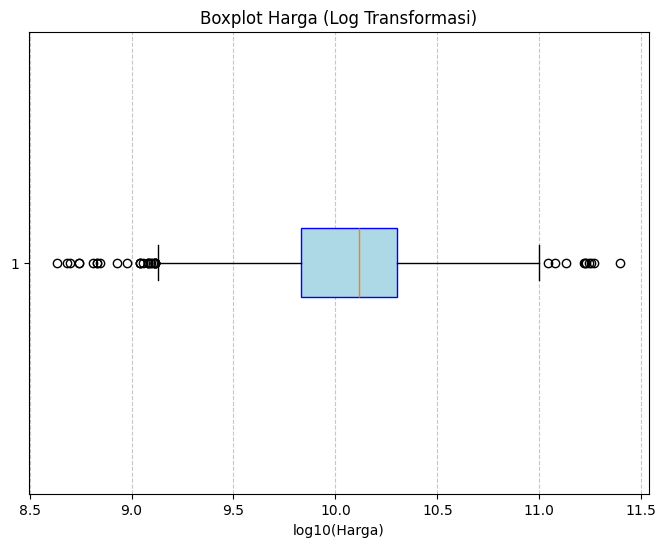

In [48]:
# visualisasi data( boxplot)
log_data_harga = np.log10(dataHarga)
plt.figure(figsize=(8, 6))
plt.boxplot(log_data_harga, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title("Boxplot Harga (Log Transformasi)")
plt.xlabel("log10(Harga)")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.show()

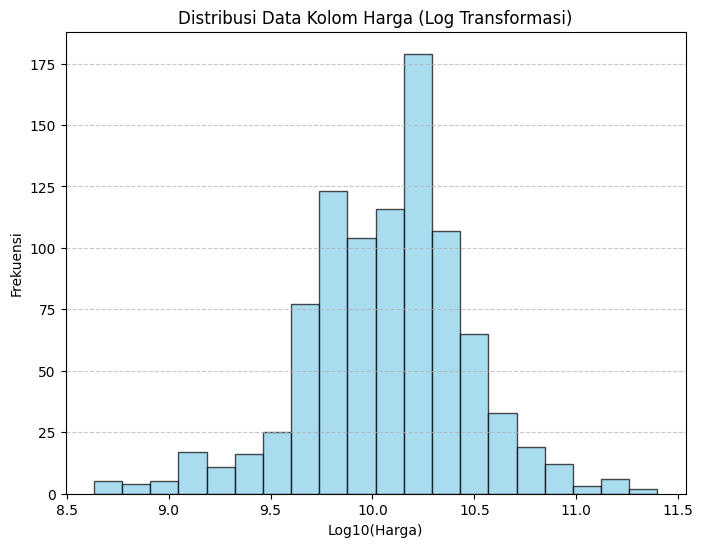

In [49]:
log_data_harga = np.log10(dataHarga)

# Membuat histogram
plt.figure(figsize=(8, 6))
plt.hist(log_data_harga, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribusi Data Kolom Harga (Log Transformasi)")
plt.xlabel("Log10(Harga)")
plt.ylabel("Frekuensi")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.show()

# Statistika Deskriptif

In [45]:
def mean(data):
  return sum(data) / len(data)

def median(data):
  data.sort()
  if len(data) % 2 == 1:
    return data[len(data) // 2]
  else:
    return (data[len(data) // 2 - 1] + data[len(data) // 2]) / 2

def modus(data):
  frekuensi = {}
  for value in data:
    if value in frekuensi:
      frekuensi[value] += 1
    else:
      frekuensi[value] = 1
  maxFrekuensi = max(frekuensi.values())
  modus = [key for key, value in frekuensi.items() if value == maxFrekuensi]
  if len(modus) == 1:
    print(f"Modus dari data adalah: {modus}")
  elif len(modus) > 1:
    print("multimode dari data adalah: ", modus)
  else:
    print("tidak ada modus")

dataHarga = [float(row[0].replace(',', '')) for row in cleanedData if row is not None]
print(f"Mean: {mean(dataHarga)}")
print(f"Median: {median(dataHarga)}")
print(f"Modus: {modus(dataHarga)}")

hargaMin = min(dataHarga)
print(f"harga minimum: {hargaMin}")
hargaMax = max(dataHarga)
print(f"harga maksimum: {hargaMax}")

Range = hargaMax - hargaMin
print(f"Rentang: {Range}")

varians = sum((x - mean(dataHarga)) ** 2 for x in dataHarga) / len(dataHarga)
print(f"Varians: {varians}")

standarDeviasi = math.sqrt(varians)
print(f"Standar Deviasi: {standarDeviasi}")

Mean: 17464194000.0
Median: 13450000000.0
Modus dari data adalah: [15000000000.0]
Modus: None
harga minimum: 430000000.0
harga maksimum: 250000000000.0
Rentang: 249570000000.0
Varians: 4.323411859963641e+20
Standar Deviasi: 20792815730.351772
